In [1]:
# (Second file-all data)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, r2_score, precision_score, recall_score, accuracy_score, precision_recall_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data2= pd.read_excel("Amazon_all.xlsx")


# Convert hit_day_utc to datetime
data2['hit_day_utc'] = pd.to_datetime(data2['hit_day_utc'], format='%m/%d/%y')

# Fill missing sales-related columns with zeros
sales_columns = ['ntb_click_attributed_units_sold', 'ntb_view_attributed_units_sold', 'ntb_click_attributed_orders', 'ntb_view_attributed_orders', 'view_attributed_units_sold', 'view_attributed_orders']
data2[sales_columns] = data2[sales_columns].fillna(0)


# Check and enforce data types
data2['impressions'] = data2['impressions'].astype(int)
data2['clicks'] = data2['clicks'].astype(int)
data2['auction_cost'] = data2['auction_cost'].astype(float)
data2['adjusted_cost'] = data2['adjusted_cost'].astype(float)

# Impute missing values with 'unknown'
data2['vertical'].fillna('unknown', inplace=True)
data2['sub_vertical'].fillna('unknown', inplace=True)

# Standardizing the categorical values
data2['placement_slot'] = data2['placement_slot'].str.lower().str.replace(" ", "_")
data2['vertical'] = data2['vertical'].str.lower().str.replace(" ", "_")
data2['sub_vertical'] = data2['sub_vertical'].str.lower().str.replace(" ", "_")

# Convert 'sub_vertical' column into dummy variables
dummy_variables = pd.get_dummies(data2['sub_vertical'], prefix='SV')
data2 = pd.concat([data2, dummy_variables], axis=1)
dummy_variables_2 = pd.get_dummies(data2['placement_slot'], prefix='placement_slot')
data2 = pd.concat([data2, dummy_variables_2], axis=1)

#data['sub_vertical'] = data['sub_vertical'].astype('category')
# Extracting time features
data2['day'] = data2['hit_day_utc'].dt.day
data2['month'] = data2['hit_day_utc'].dt.month
data2['weekday'] = data2['hit_day_utc'].dt.weekday
duplicates = data2.duplicated()
duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")
duplicate_rows = data2[data2.duplicated()]
print(duplicate_rows)
# Remove duplicates
data2 = data2.drop_duplicates()



Number of duplicate rows: 193080
        ADV_ID    AD_ID         SKU     placement_slot  impressions  clicks  \
5545     32886  3232561  2050620356  offsite_mobileweb        14406       0   
5663     50420  4341415  1416111066    offsite_desktop         1180       0   
5672     40413  6185767  1557213550  offsite_mobileweb          330       0   
5675     40413  2046247  1557213550    offsite_desktop         2685       0   
5680     40413  2046247  1557213550  offsite_mobileweb        11176      10   
...        ...      ...         ...                ...          ...     ...   
560965   35958  7417106  5979285425  offsite_mobileapp            2       0   
560967   35958  7417106  5979285425    offsite_desktop         2868       0   
560968   35958  7417106  5979285425    offsite_desktop        28228       0   
560969   35958  7417106  5979285425    offsite_desktop         3858       0   
560978   89360  9879454  2116713348  offsite_mobileweb          176       0   

        auction_co

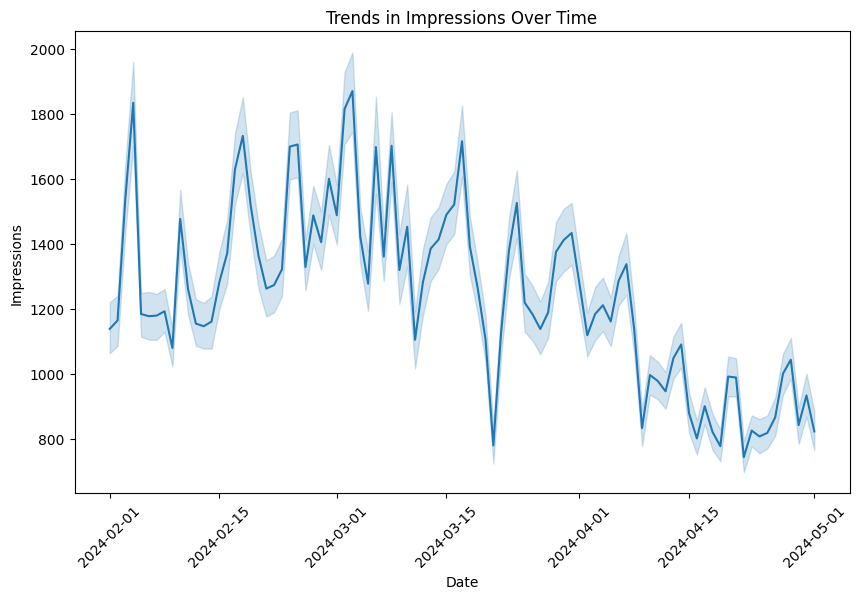

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Convert 'hit_day_utc' to datetime
data2['hit_day_utc'] = pd.to_datetime(data2['hit_day_utc'])

# Trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='hit_day_utc', y='impressions', data=data2)
plt.title('Trends in Impressions Over Time')
plt.xlabel('Date')
plt.ylabel('Impressions')
plt.xticks(rotation=45)
plt.show()

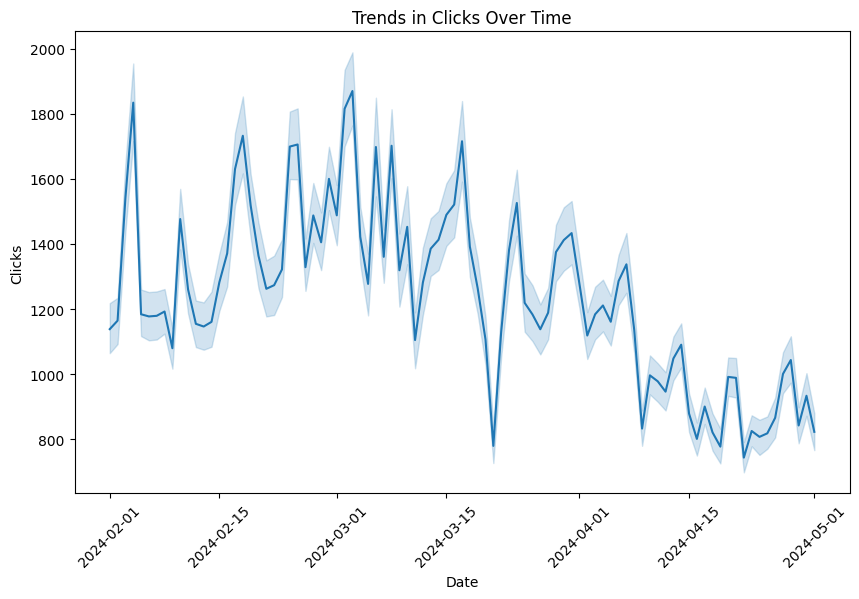

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Convert 'hit_day_utc' to datetime
data2['hit_day_utc'] = pd.to_datetime(data2['hit_day_utc'])

# Trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='hit_day_utc', y='impressions', data=data2)
plt.title('Trends in Clicks Over Time')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Model (Target Variable- Impressions, using all data)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, r2_score, precision_score, recall_score, accuracy_score, precision_recall_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data2 = pd.get_dummies(data2, columns=['weekday'], prefix='weekday')
# Split the data
df2 = data2.drop(columns=['ADV_ID', 'AD_ID', 'SKU', 'clicks', 'placement_slot','auction_cost' , 'day', 'month', 'impressions', 'hit_day_utc', 'sub_vertical', 'vertical', 'targeting_secondary', 'ntb_click_attributed_units_sold', 'ntb_view_attributed_units_sold', 'ntb_click_attributed_orders', 'ntb_view_attributed_orders', 'view_attributed_units_sold', 'view_attributed_orders'])
X = df2
y = data2['impressions']

# Convert the regression target into a binary classification target
median_impressions = y.median()
y_class = (y > median_impressions).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

print(f"Logistic Regression Precision: {precision_score(y_test, y_pred_lr)}")
print(f"Logistic Regression Recall: {recall_score(y_test, y_pred_lr)}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)
auc_pr_lr = auc(recall_lr, precision_lr)
print(f"Logistic Regression AUC-PR: {auc_pr_lr}")
print(f"Logistic Regression MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"Logistic Regression R²: {r2_score(y_test, y_pred_lr)}")

# Significant coefficients for Logistic Regression
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_[0]})
coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()
coefficients.sort_values(by='AbsCoefficient', ascending=False, inplace=True)
print(coefficients[['Feature', 'Coefficient']])

Logistic Regression Precision: 0.992955054338922
Logistic Regression Recall: 0.9923047535883862
Logistic Regression Accuracy: 0.9926612486749476
Logistic Regression AUC-PR: 0.9996485377513228
Logistic Regression MAE: 0.007338751325052323
Logistic Regression R²: 0.9706445387240591
                                              Feature  Coefficient
1786            AS_category=portable_air_conditioners    -9.002675
702                     AS_category=dog_rawhide_bones    -8.659080
2105              AS_category=stud_finders_&_scanners    -7.642080
0                                       adjusted_cost     7.533747
852           AS_category=farming_&_urban_agriculture    -6.303426
...                                               ...          ...
1440  AS_category=men's_baseball_sanitary_liner_socks     0.000000
1394                 AS_category=mac_gaming_keyboards     0.000000
1399                 AS_category=magazines_for_baby-3     0.000000
1094                     AS_category=hanging_plan

In [14]:
# Extract coefficients for 'targeting_secondary'
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_[0]})
targeting_secondary_coefficients = coefficients[coefficients['Feature'].str.contains('AS')]
targeting_secondary_coefficients['AbsCoefficient'] = targeting_secondary_coefficients['Coefficient'].abs()
targeting_secondary_coefficients.sort_values(by='AbsCoefficient', ascending=False, inplace=True)

# Display top 10 coefficients for 'targeting_secondary'
print(targeting_secondary_coefficients.head(10)[['Feature', 'Coefficient']])

                                               Feature  Coefficient
1786             AS_category=portable_air_conditioners    -9.002675
702                      AS_category=dog_rawhide_bones    -8.659080
2105               AS_category=stud_finders_&_scanners    -7.642080
852            AS_category=farming_&_urban_agriculture    -6.303426
855                          AS_category=feminine_care    -5.871376
769   AS_category=electric_guitar_amplifiers_&_preamps    -5.705674
2032         AS_category=split-system_air_conditioners    -5.563957
630                                  AS_category=diets    -5.175679
9     AS_category=acoustic_guitar_amplifiers_&_preamps    -4.900957
1974                 AS_category=small_animal_supplies    -4.583822


/var/folders/gw/1hbycv6d5hdbrwt0xn0wt2600000gn/T/ipykernel_94499/2693618171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targeting_secondary_coefficients['AbsCoefficient'] = targeting_secondary_coefficients['Coefficient'].abs()
/var/folders/gw/1hbycv6d5hdbrwt0xn0wt2600000gn/T/ipykernel_94499/2693618171.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targeting_secondary_coefficients.sort_values(by='AbsCoefficient', ascending=False, inplace=True)


In [15]:
# Extract coefficients for 'targeting_secondary'
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_[0]})
targeting_secondary_coefficients = coefficients[coefficients['Feature'].str.contains('AS')]

# Filter and sort positive coefficients
positive_coefficients = targeting_secondary_coefficients[targeting_secondary_coefficients['Coefficient'] > 0]
positive_coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

# Display top 10 positive coefficients for 'targeting_secondary'
print(positive_coefficients.head(10)[['Feature', 'Coefficient']])

                                              Feature  Coefficient
2086                       AS_category=storage_chests     2.334140
107   AS_category=automotive_replacement_brake_rotors     2.330823
2330               AS_category=women's_athletic_pants     2.216384
683   AS_category=dog_food_toppings,_gravies_&_sauces     1.993902
1342                             AS_category=lemonade     1.899009
1733         AS_category=photography_&_graphic_design     1.890624
813          AS_category=espresso_machine_accessories     1.856670
1206                  AS_category=indoor_compost_bins     1.773834
799          AS_category=engine_&_oil_fluid_additives     1.758110
2095     AS_category=strength_training_medicine_balls     1.747835


/var/folders/gw/1hbycv6d5hdbrwt0xn0wt2600000gn/T/ipykernel_94499/3492944538.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)


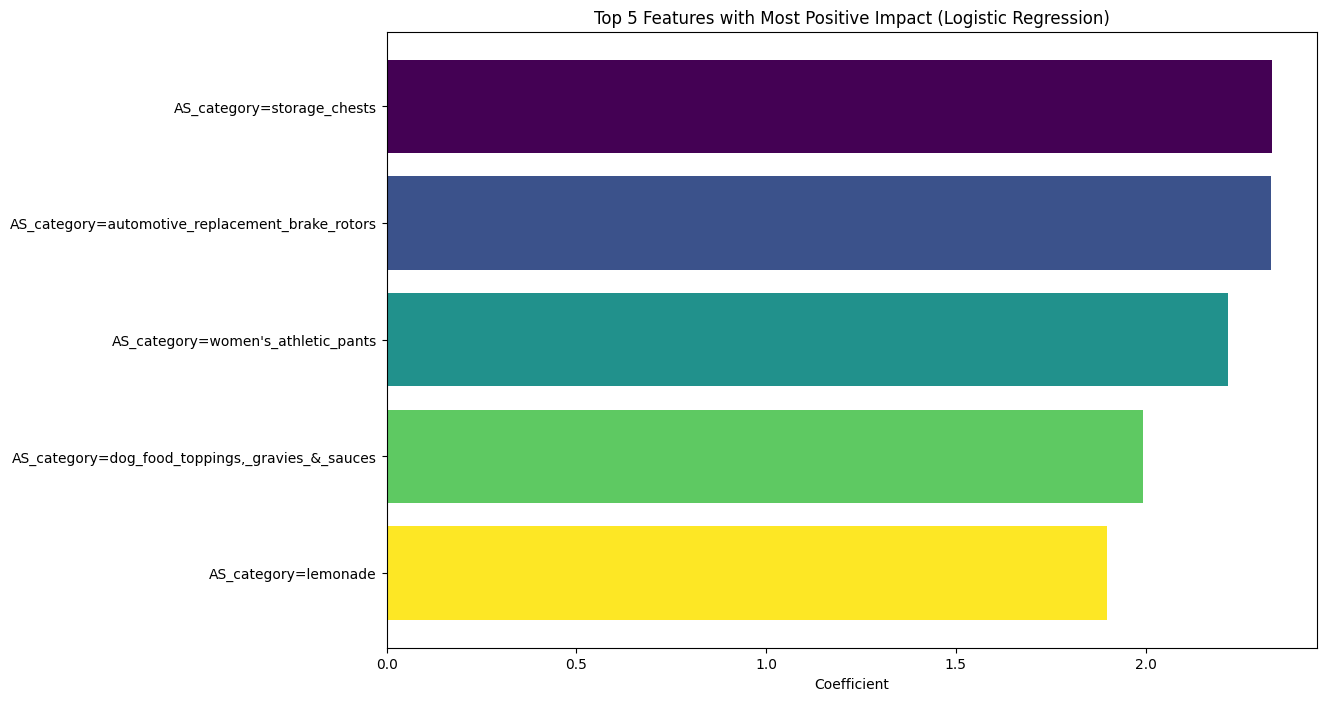

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data containing the top 10 features with the most positive coefficients
positive_features = pd.DataFrame({
    'Feature': [
        'AS_category=storage_chests',
        'AS_category=automotive_replacement_brake_rotors',
        "AS_category=women's_athletic_pants",
        'AS_category=dog_food_toppings,_gravies_&_sauces',
        'AS_category=lemonade',
    
    ],
    'Coefficient': [
        2.334140,
        2.330823,
        2.216384,
        1.993902,
        1.899009,
    
    ]
})

# Create the bar chart with different colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(positive_features)))

plt.figure(figsize=(12, 8))
plt.barh(positive_features['Feature'], positive_features['Coefficient'], color=colors)
plt.xlabel('Coefficient')
plt.title('Top 5 Features with Most Positive Impact (Logistic Regression)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest positive impact on top
plt.show()


In [9]:
# Model for continuous target variable 'Impressions'
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import numpy as np

#data2 = pd.get_dummies(data2, columns=['weekday'], prefix='weekday')
# Split the data
df2 = data2.drop(columns=['ADV_ID', 'AD_ID', 'SKU', 'clicks', 'placement_slot','auction_cost' , 'day', 'month', 'impressions', 'hit_day_utc', 'sub_vertical', 'vertical', 'targeting_secondary', 'ntb_click_attributed_units_sold', 'ntb_view_attributed_units_sold', 'ntb_click_attributed_orders', 'ntb_view_attributed_orders', 'view_attributed_units_sold', 'view_attributed_orders'])
X = df2
y = data2['impressions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
def custom_accuracy(y_true, y_pred, threshold=0.1):
    return np.mean(np.abs((y_true - y_pred) / y_true) < threshold)

print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Random Forest R²: {r2_score(y_test, y_pred_rf)}")
print(f"Custom Accuracy: {custom_accuracy(y_test, y_pred_rf)}")

# Approximating signs for Random Forest features
rf_feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
rf_feature_importances['Sign'] = np.sign(X_train.corrwith(y_train))
rf_feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(rf_feature_importances[['Feature', 'Importance', 'Sign']])


Random Forest MAE: 69.76250062869084
Random Forest R²: 0.9830493318402428
Custom Accuracy: 0.7865782392432932
                             Feature    Importance  Sign
0                      adjusted_cost  9.751923e-01   NaN
38                           weekday  5.436114e-03   NaN
31                        SV_unknown  2.967378e-03   NaN
28     SV_tools_and_home_improvement  2.797701e-03   NaN
23                SV_pet_consumables  1.968554e-03   NaN
35    placement_slot_offsite_desktop  1.356236e-03   NaN
4                          SV_beauty  1.342468e-03   NaN
37  placement_slot_offsite_mobileweb  1.340637e-03   NaN
20          SV_parts_and_accessories  1.115008e-03   NaN
29                           SV_toys  1.061939e-03   NaN
11       SV_health_and_personal_care  6.767881e-04   NaN
9                  SV_grocery_-_food  6.320309e-04   NaN
8              SV_grocery_-_beverage  6.067874e-04   NaN
12             SV_home_and_furniture  5.721103e-04   NaN
13      SV_home_and_garden_-_outdoo

In [8]:

# XGBoost Regressor Model
# Define the custom accuracy metric

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
def custom_accuracy(y_true, y_pred_xgb, threshold=0.1):
    return np.mean(np.abs((y_true - y_pred_xgb) / y_true) < threshold)

print(f"XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"XGBoost R²: {r2_score(y_test, y_pred_xgb)}")
print(f"Custom Accuracy: {custom_accuracy(y_test, y_pred_xgb)}")

# Approximating signs for XGBoost features
xgb_feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_model.feature_importances_})
xgb_feature_importances['Sign'] = np.sign(X_train.corrwith(y_train))
xgb_feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(xgb_feature_importances[['Feature', 'Importance']])
print(f"Custom Accuracy: {custom_accuracy(y_test, y_pred_xgb)}")

XGBoost MAE: 119.75397359796493
XGBoost R²: 0.951844334602356
Custom Accuracy: 0.5408252018156614
                             Feature  Importance
0                      adjusted_cost    0.627552
28     SV_tools_and_home_improvement    0.100264
20          SV_parts_and_accessories    0.069687
23                SV_pet_consumables    0.023275
4                          SV_beauty    0.022561
8              SV_grocery_-_beverage    0.017818
38                           weekday    0.015775
9                  SV_grocery_-_food    0.015583
26                          SV_shoes    0.011839
13      SV_home_and_garden_-_outdoor    0.011244
11       SV_health_and_personal_care    0.010625
31                        SV_unknown    0.010486
12             SV_home_and_furniture    0.008396
29                           SV_toys    0.007894
5                            SV_biss    0.007545
35    placement_slot_offsite_desktop    0.006588
7            SV_consumer_electronics    0.006238
2              SV_au

In [9]:
# Model (Target Variable- Clicks, using all data)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, r2_score, precision_score, recall_score, accuracy_score, precision_recall_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Split the data
X = data2.drop(columns=['ADV_ID', 'AD_ID', 'SKU', 'clicks', 'placement_slot','auction_cost' , 'day', 'month', 'impressions', 'hit_day_utc', 'sub_vertical', 'vertical', 'targeting_secondary', 'ntb_click_attributed_units_sold', 'ntb_view_attributed_units_sold', 'ntb_click_attributed_orders', 'ntb_view_attributed_orders', 'view_attributed_units_sold', 'view_attributed_orders'])
y_class = data2['clicks']


X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)


# Random Forest Classifier Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(f"Random Forest Precision: {precision_score(y_test, y_pred_rf, average='macro')}")
print(f"Random Forest Recall: {recall_score(y_test, y_pred_rf, average='macro')}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Random Forest R²: {r2_score(y_test, y_pred_rf)}")

# Approximating signs for Random Forest features
rf_feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
rf_feature_importances['Sign'] = np.sign(X_train.corrwith(y_train))
rf_feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(rf_feature_importances[['Feature', 'Importance']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Precision: 0.7162128711037453
Random Forest Recall: 0.7170273281081853
Random Forest Accuracy: 0.9362208148732026
Random Forest MAE: 0.1252480226142263
Random Forest R²: 0.602388691659504
                                    Feature  Importance
0                             adjusted_cost    0.920829
37         placement_slot_offsite_mobileweb    0.006724
36         placement_slot_offsite_mobileapp    0.005805
35           placement_slot_offsite_desktop    0.004170
11    sub_vertical_health_and_personal_care    0.003804
38                                weekday_0    0.003395
43                                weekday_5    0.003383
42                                weekday_4    0.003277
8           sub_vertical_grocery_-_beverage    0.003225
39                                weekday_1    0.003167
44                                weekday_6    0.003154
41                                weekday_3    0.003093
40                                weekday_2    0.002747
15            

In [33]:
# Model for View_attributed_units_sold (using all data)
X = data2.drop(columns=['ADV_ID', 'AD_ID', 'SKU', 'weekday', 'placement_slot','auction_cost' , 'day', 'month', 'hit_day_utc', 'sub_vertical', 'vertical', 'targeting_secondary', 'ntb_click_attributed_units_sold', 'ntb_view_attributed_units_sold', 'ntb_click_attributed_orders', 'ntb_view_attributed_orders', 'view_attributed_units_sold'])
y_class = data2['view_attributed_units_sold']


X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)


# Random Forest Classifier Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(f"Random Forest Precision: {precision_score(y_test, y_pred_rf, average='macro')}")
print(f"Random Forest Recall: {recall_score(y_test, y_pred_rf, average='macro')}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Random Forest R²: {r2_score(y_test, y_pred_rf)}")

# Approximating signs for Random Forest features
rf_feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
#rf_feature_importances['Sign'] = np.sign(X_train.corrwith(y_train))
rf_feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(rf_feature_importances[['Feature', 'Importance']])

Random Forest Precision: 0.12030910426614785
Random Forest Recall: 0.10613490090516217
Random Forest Accuracy: 0.9395912043706341
Random Forest MAE: 0.12853687043026826
Random Forest R²: 0.7423632012146971
                                    Feature    Importance
3                    view_attributed_orders  7.962729e-01
2                             adjusted_cost  8.622153e-02
0                               impressions  7.231639e-02
39         placement_slot_offsite_mobileapp  7.460313e-03
1                                    clicks  6.404737e-03
14    sub_vertical_health_and_personal_care  5.767445e-03
12              sub_vertical_grocery_-_food  4.152705e-03
34                     sub_vertical_unknown  2.993883e-03
40         placement_slot_offsite_mobileweb  2.505266e-03
38           placement_slot_offsite_desktop  2.180217e-03
11          sub_vertical_grocery_-_beverage  1.926152e-03
30              sub_vertical_sporting_goods  1.536832e-03
5           sub_vertical_automotive_-_ot

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
# (Second file-all data)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, r2_score, precision_score, recall_score, accuracy_score, precision_recall_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data2= pd.read_excel("Amazon_all.xlsx")


# Convert hit_day_utc to datetime
data2['hit_day_utc'] = pd.to_datetime(data2['hit_day_utc'], format='%m/%d/%y')

# Fill missing sales-related columns with zeros
sales_columns = ['ntb_click_attributed_units_sold', 'ntb_view_attributed_units_sold', 'ntb_click_attributed_orders', 'ntb_view_attributed_orders', 'view_attributed_units_sold', 'view_attributed_orders']
data2[sales_columns] = data2[sales_columns].fillna(0)


# Check and enforce data types
data2['impressions'] = data2['impressions'].astype(int)
data2['clicks'] = data2['clicks'].astype(int)
data2['auction_cost'] = data2['auction_cost'].astype(float)
data2['adjusted_cost'] = data2['adjusted_cost'].astype(float)

# Impute missing values with 'unknown'
data2['vertical'].fillna('unknown', inplace=True)
data2['sub_vertical'].fillna('unknown', inplace=True)

# Standardizing the categorical values
data2['placement_slot'] = data2['placement_slot'].str.lower().str.replace(" ", "_")
data2['vertical'] = data2['vertical'].str.lower().str.replace(" ", "_")
data2['sub_vertical'] = data2['sub_vertical'].str.lower().str.replace(" ", "_")

# Convert 'sub_vertical' column into dummy variables
dummy_variables = pd.get_dummies(data2['sub_vertical'], prefix='SV')
data2 = pd.concat([data2, dummy_variables], axis=1)
dummy_variables_2 = pd.get_dummies(data2['placement_slot'], prefix='placement_slot')
data2 = pd.concat([data2, dummy_variables_2], axis=1)

#data['sub_vertical'] = data['sub_vertical'].astype('category')
# Extracting time features
data2['day'] = data2['hit_day_utc'].dt.day
data2['month'] = data2['hit_day_utc'].dt.month
data2['weekday'] = data2['hit_day_utc'].dt.weekday
duplicates = data2.duplicated()
duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")
duplicate_rows = data2[data2.duplicated()]
print(duplicate_rows)
# Remove duplicates
data2 = data2.drop_duplicates()

Number of duplicate rows: 193080
        ADV_ID    AD_ID         SKU     placement_slot  impressions  clicks  \
5545     32886  3232561  2050620356  offsite_mobileweb        14406       0   
5663     50420  4341415  1416111066    offsite_desktop         1180       0   
5672     40413  6185767  1557213550  offsite_mobileweb          330       0   
5675     40413  2046247  1557213550    offsite_desktop         2685       0   
5680     40413  2046247  1557213550  offsite_mobileweb        11176      10   
...        ...      ...         ...                ...          ...     ...   
560965   35958  7417106  5979285425  offsite_mobileapp            2       0   
560967   35958  7417106  5979285425    offsite_desktop         2868       0   
560968   35958  7417106  5979285425    offsite_desktop        28228       0   
560969   35958  7417106  5979285425    offsite_desktop         3858       0   
560978   89360  9879454  2116713348  offsite_mobileweb          176       0   

        auction_co

In [3]:
# Model for NTB (using all data)
# Split the data
X = data2.drop(columns=['ADV_ID', 'AD_ID', 'SKU', 'clicks', 'placement_slot','auction_cost','weekday' ,'day', 'month', 'hit_day_utc', 'sub_vertical', 'vertical', 'targeting_secondary', 'view_attributed_units_sold','ntb_view_attributed_units_sold','ntb_click_attributed_units_sold', 'view_attributed_orders'])
y_class = data2['ntb_view_attributed_units_sold']


X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)


# Random Forest Classifier Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(f"Random Forest Precision: {precision_score(y_test, y_pred_rf, average='macro')}")
print(f"Random Forest Recall: {recall_score(y_test, y_pred_rf, average='macro')}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Random Forest R²: {r2_score(y_test, y_pred_rf)}")

# Approximating signs for Random Forest features
rf_feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
#rf_feature_importances['Sign'] = np.sign(X_train.corrwith(y_train))
rf_feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(rf_feature_importances[['Feature', 'Importance']])
# Precision-Recall and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_rf)
auc_pr = auc(recall, precision)
print(f"Random Forest AUC-PR: {auc_pr}")

# Plotting the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label=f'Random Forest (AUC-PR = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


Random Forest Precision: 0.4014147601757786
Random Forest Recall: 0.28350526245290464
Random Forest Accuracy: 0.9794650865700851
Random Forest MAE: 0.03019760267456715
Random Forest R²: 0.752709820019839
                             Feature  Importance
3         ntb_view_attributed_orders    0.888849
1                      adjusted_cost    0.048438
0                        impressions    0.044639
39  placement_slot_offsite_mobileapp    0.003960
34                        SV_unknown    0.001486
14       SV_health_and_personal_care    0.001139
40  placement_slot_offsite_mobileweb    0.001126
38    placement_slot_offsite_desktop    0.001082
11             SV_grocery_-_beverage    0.001041
2        ntb_click_attributed_orders    0.000819
30                 SV_sporting_goods    0.000787
15             SV_home_and_furniture    0.000762
16      SV_home_and_garden_-_outdoor    0.000614
5              SV_automotive_-_other    0.000547
31     SV_tools_and_home_improvement    0.000544
18          

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: multiclass format is not supported

In [40]:
# Some analysis (without model, using all data)
# Group by placement slot and calculate key metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data3= pd.read_excel("Amazon_all.xlsx")


# Convert hit_day_utc to datetime
data3['hit_day_utc'] = pd.to_datetime(data3['hit_day_utc'], format='%m/%d/%y')

# Fill missing sales-related columns with zeros
sales_columns = ['ntb_click_attributed_units_sold', 'ntb_view_attributed_units_sold', 'ntb_click_attributed_orders', 'ntb_view_attributed_orders', 'view_attributed_units_sold', 'view_attributed_orders']
data3[sales_columns] = data3[sales_columns].fillna(0)

# Remove duplicates
data3 = data3.drop_duplicates()
data3 = data3.drop(columns=['ADV_ID', 'AD_ID', 'SKU'])
# Check and enforce data types
data3['impressions'] = data3['impressions'].astype(int)
data3['clicks'] = data3['clicks'].astype(int)
data3['auction_cost'] = data3['auction_cost'].astype(float)
data3['adjusted_cost'] = data3['adjusted_cost'].astype(float)

# Impute missing values with 'unknown'
data3['vertical'].fillna('unknown', inplace=True)
data3['sub_vertical'].fillna('unknown', inplace=True)

# Standardizing the categorical values
data3['placement_slot'] = data3['placement_slot'].str.lower().str.replace(" ", "_")
data3['vertical'] = data3['vertical'].str.lower().str.replace(" ", "_")
data3['sub_vertical'] = data3['sub_vertical'].str.lower().str.replace(" ", "_")
placement_analysis = data3.groupby('placement_slot').agg({
    'impressions': 'sum',
    'clicks': 'sum',
    'auction_cost': 'sum',
    'adjusted_cost': 'sum',
    'ntb_click_attributed_units_sold': 'sum',
    'ntb_view_attributed_units_sold': 'sum',
    'ntb_click_attributed_orders': 'sum',
    'ntb_view_attributed_orders': 'sum'
}).reset_index()

placement_analysis['CTR'] = placement_analysis['clicks'] / placement_analysis['impressions']
placement_analysis['CPC'] = placement_analysis['auction_cost'] / placement_analysis['clicks']
placement_analysis['CPM'] = placement_analysis['auction_cost'] / placement_analysis['impressions'] * 1000
placement_analysis['Cost_per_NTB_Unit'] = placement_analysis['auction_cost'] / (
    placement_analysis['ntb_click_attributed_units_sold'] + placement_analysis['ntb_view_attributed_units_sold']
)

print(placement_analysis)


      placement_slot  impressions  clicks  auction_cost  adjusted_cost  \
0    offsite_desktop    230208892   18074  2.954614e+06   2.037957e+06   
1  offsite_mobileapp      2271210     424  3.154924e+04   1.993571e+04   
2  offsite_mobileweb    217352557   63442  2.860371e+06   1.988398e+06   

   ntb_click_attributed_units_sold  ntb_view_attributed_units_sold  \
0                            726.0                         26137.0   
1                            669.0                         23045.0   
2                            726.0                         26116.0   

   ntb_click_attributed_orders  ntb_view_attributed_orders       CTR  \
0                        701.0                     23567.0  0.000079   
1                        645.0                     20750.0  0.000187   
2                        701.0                     23547.0  0.000292   

          CPC        CPM  Cost_per_NTB_Unit  
0  163.473171  12.834492         109.988240  
1   74.408591  13.890940           1.3304

In [42]:
category_analysis = data3.groupby('sub_vertical').agg({
    'impressions': 'sum',
    'clicks': 'sum',
    'auction_cost': 'sum',
    'adjusted_cost': 'sum',
    'ntb_click_attributed_units_sold': 'sum',
    'ntb_view_attributed_units_sold': 'sum',
    'ntb_click_attributed_orders': 'sum',
    'ntb_view_attributed_orders': 'sum'
}).reset_index()

category_analysis['CTR'] = category_analysis['clicks'] / category_analysis['impressions']
category_analysis['CPC'] = category_analysis['auction_cost'] / category_analysis['clicks']
category_analysis['CPM'] = category_analysis['auction_cost'] / category_analysis['impressions'] * 1000
category_analysis['Cost_per_NTB_Unit'] = category_analysis['auction_cost'] / (
    category_analysis['ntb_click_attributed_units_sold'] + category_analysis['ntb_view_attributed_units_sold']
)

print(category_analysis)

                  sub_vertical  impressions  clicks  auction_cost  \
0                      apparel      9986395     708  1.139004e+05   
1           automotive_-_other     22486588    3205  3.000551e+05   
2             baby_consumables      4829650     645  5.408286e+04   
3                       beauty     43231954    3518  5.236145e+05   
4                         biss      2243768     180  5.217187e+04   
5                       camera       795700     193  1.104889e+04   
6         consumer_electronics     13942352    1460  1.701637e+05   
7           grocery_-_beverage     21318623    7717  2.143596e+05   
8               grocery_-_food     47263314    2688  5.836722e+05   
9            hardlines_-_other      3548434     238  4.173864e+04   
10    health_and_personal_care     78357246   19634  1.051309e+06   
11          home_and_furniture     46010582   12405  5.346794e+05   
12   home_and_garden_-_outdoor     10817955    1715  1.714898e+05   
13                     jewelry    

/var/folders/gw/1hbycv6d5hdbrwt0xn0wt2600000gn/T/ipykernel_67570/3747326553.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='impressions', y='sub_vertical', data=top_10_categories, palette='viridis')
/var/folders/gw/1hbycv6d5hdbrwt0xn0wt2600000gn/T/ipykernel_67570/3747326553.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='clicks', y='sub_vertical', data=top_10_categories, palette='viridis')
/var/folders/gw/1hbycv6d5hdbrwt0xn0wt2600000gn/T/ipykernel_67570/3747326553.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='adjust

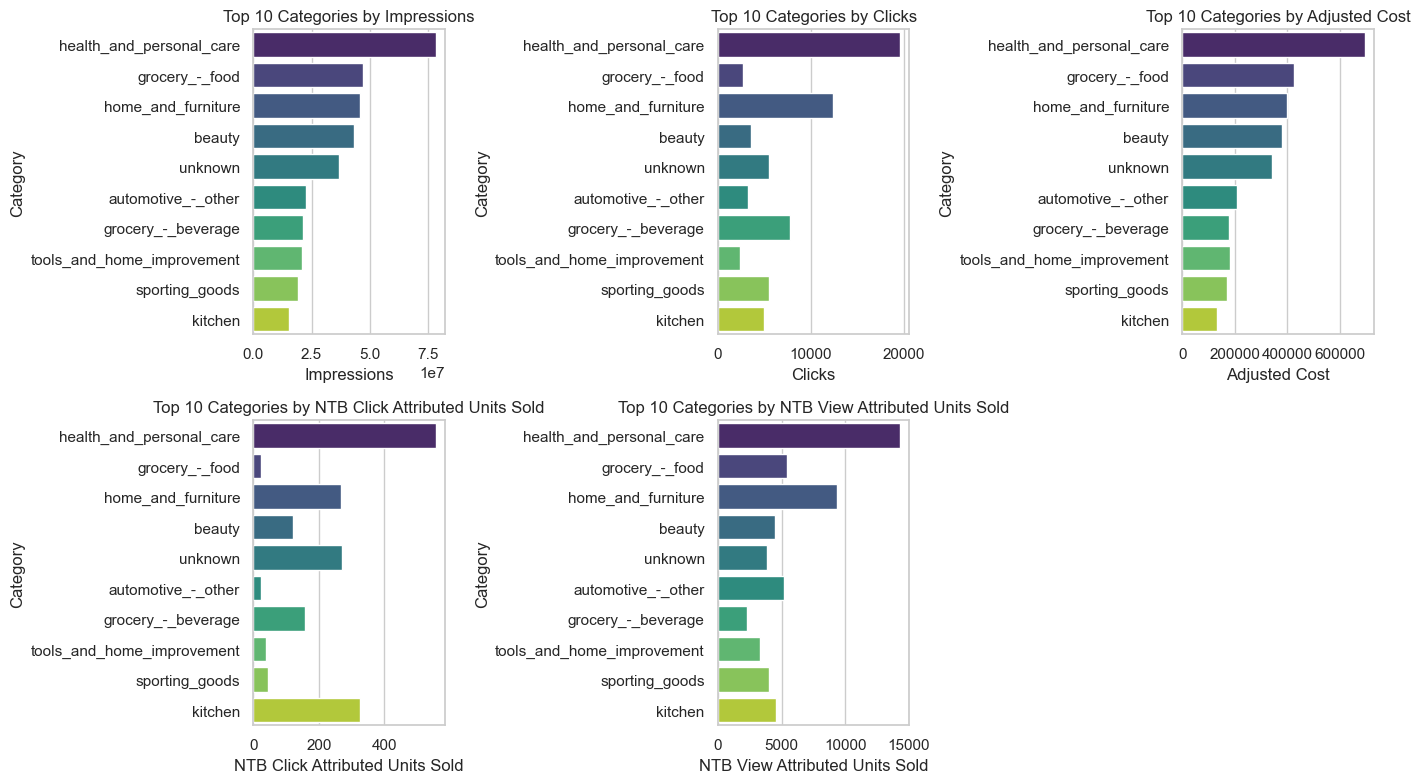

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 categories based on impressions
top_10_categories = category_analysis.nlargest(10, 'impressions')

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot for Impressions
plt.subplot(2, 3, 1)
sns.barplot(x='impressions', y='sub_vertical', data=top_10_categories, palette='viridis')
plt.title('Top 10 Categories by Impressions')
plt.xlabel('Impressions')
plt.ylabel('Category')

# Plot for Clicks
plt.subplot(2, 3, 2)
sns.barplot(x='clicks', y='sub_vertical', data=top_10_categories, palette='viridis')
plt.title('Top 10 Categories by Clicks')
plt.xlabel('Clicks')
plt.ylabel('Category')

# Plot for Adjusted Cost
plt.subplot(2, 3, 3)
sns.barplot(x='adjusted_cost', y='sub_vertical', data=top_10_categories, palette='viridis')
plt.title('Top 10 Categories by Adjusted Cost')
plt.xlabel('Adjusted Cost')
plt.ylabel('Category')

# Plot for NTB Click Attributed Units Sold
plt.subplot(2, 3, 4)
sns.barplot(x='ntb_click_attributed_units_sold', y='sub_vertical', data=top_10_categories, palette='viridis')
plt.title('Top 10 Categories by NTB Click Attributed Units Sold')
plt.xlabel('NTB Click Attributed Units Sold')
plt.ylabel('Category')

# Plot for NTB View Attributed Units Sold
plt.subplot(2, 3, 5)
sns.barplot(x='ntb_view_attributed_units_sold', y='sub_vertical', data=top_10_categories, palette='viridis')
plt.title('Top 10 Categories by NTB View Attributed Units Sold')
plt.xlabel('NTB View Attributed Units Sold')
plt.ylabel('Category')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/gw/1hbycv6d5hdbrwt0xn0wt2600000gn/T/ipykernel_67570/497115764.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ntb_click_attributed_units_sold', y='sub_vertical', data=top_10_categories, palette='viridis')
/var/folders/gw/1hbycv6d5hdbrwt0xn0wt2600000gn/T/ipykernel_67570/497115764.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ntb_view_attributed_units_sold', y='sub_vertical', data=top_10_categories, palette='viridis')


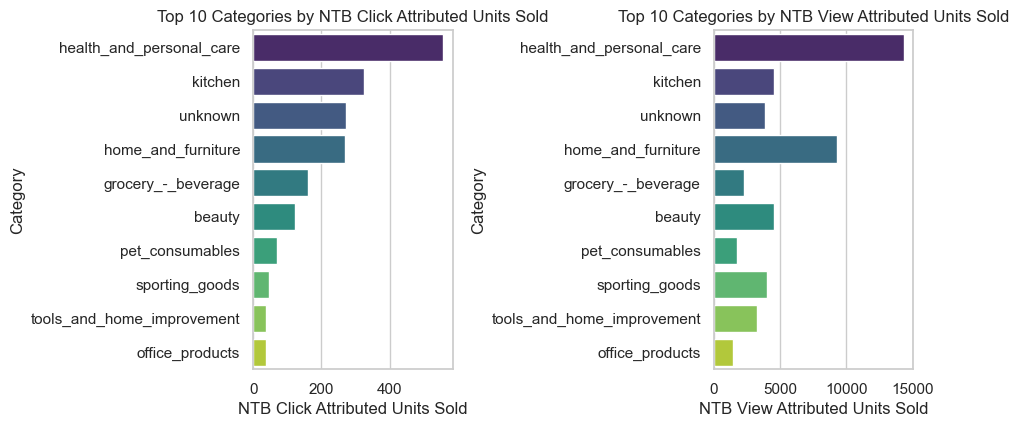

In [56]:
# Select top 10 categories based on impressions
top_10_categories = category_analysis.nlargest(10, 'ntb_click_attributed_units_sold')
# Set the figure size
plt.figure(figsize=(14, 8))
# Plot for NTB Click Attributed Units Sold
plt.subplot(2, 3, 4)
sns.barplot(x='ntb_click_attributed_units_sold', y='sub_vertical', data=top_10_categories, palette='viridis')
plt.title('Top 10 Categories by NTB Click Attributed Units Sold')
plt.xlabel('NTB Click Attributed Units Sold')
plt.ylabel('Category')

# Plot for NTB View Attributed Units Sold
plt.subplot(2, 3, 5)
sns.barplot(x='ntb_view_attributed_units_sold', y='sub_vertical', data=top_10_categories, palette='viridis')
plt.title('Top 10 Categories by NTB View Attributed Units Sold')
plt.xlabel('NTB View Attributed Units Sold')
plt.ylabel('Category')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/gw/1hbycv6d5hdbrwt0xn0wt2600000gn/T/ipykernel_67570/376110391.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CPM', y='sub_vertical', data=last_10_categories, palette='viridis')


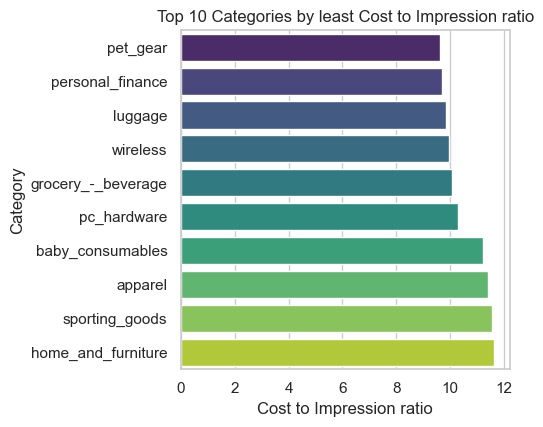

In [54]:
# Select last 10 categories based on 'Cost_per_NTB_Unit'
last_10_categories = category_analysis.nsmallest(10, 'CPM')

# Set the figure size
plt.figure(figsize=(14, 8))
# Plot for Cost per NTB Unit (last 10)
plt.subplot(2, 3, 6)
sns.barplot(x='CPM', y='sub_vertical', data=last_10_categories, palette='viridis')
plt.title('Top 10 Categories by least Cost to Impression ratio')
plt.xlabel('Cost to Impression ratio')
plt.ylabel('Category')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/gw/1hbycv6d5hdbrwt0xn0wt2600000gn/T/ipykernel_67570/1323417342.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cost_per_NTB_Unit', y='sub_vertical', data=last_10_categories, palette='viridis')


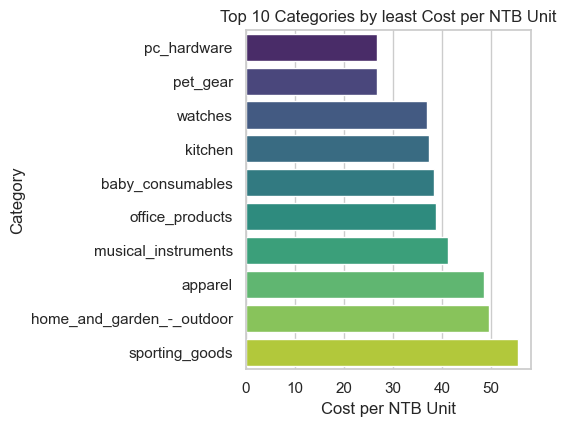

In [47]:
# Select last 10 categories based on 'Cost_per_NTB_Unit'
last_10_categories = category_analysis.nsmallest(10, 'Cost_per_NTB_Unit')

# Set the figure size
plt.figure(figsize=(14, 8))
# Plot for Cost per NTB Unit (last 10)
plt.subplot(2, 3, 6)
sns.barplot(x='Cost_per_NTB_Unit', y='sub_vertical', data=last_10_categories, palette='viridis')
plt.title('Top 10 Categories by least Cost per NTB Unit')
plt.xlabel('Cost per NTB Unit')
plt.ylabel('Category')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()